# 100 Weighted Interactions

## Purpose:
<p>This notebook creates a modified version of our cleaned and prepped businesses table. The outputted file also contains a
an 'num_interactions' column which is a weighted combination of Yelp reviews,checkisn and tips.</p>

## Input:
'businessPrepped.pkl'
## Output:
'businessFinal.pkl'

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%matplotlib inline

In [2]:
businessPrepped = pd.read_pickle('../../data/prep/businessPrepped.pkl')

In [3]:
interactionsDf = businessPrepped[['review_count','checkins','tipcount']]

Let's observe the mean amount of reviews, checkins and tips of every business.

Text(0.5,1,'Number')

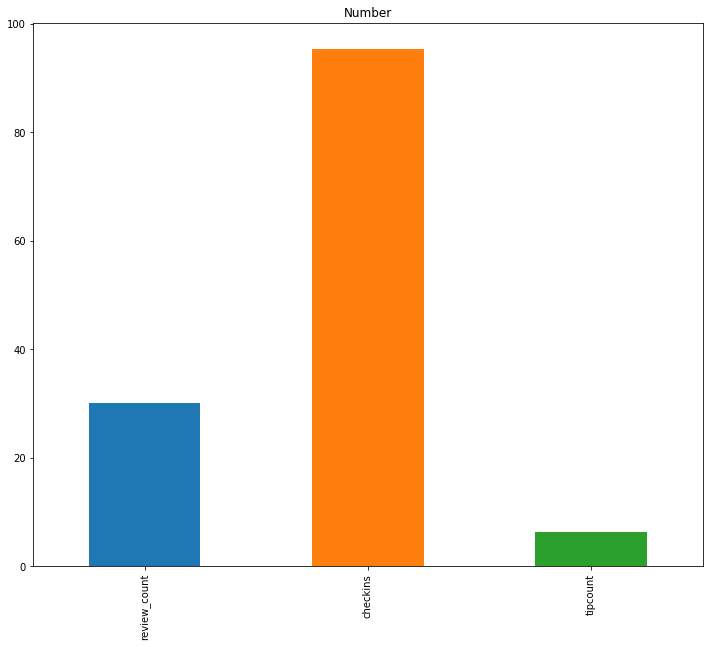

In [4]:
plot = interactionsDf.mean().plot(kind = 'bar', figsize = (12,10))
plot.set_title("Number")

Checkins are the most common interaction, followed by reviews and then tips. We can use these figures to try and weight their value.

In [5]:
interactionsDf.mean()

review_count    30.137059
checkins        95.369446
tipcount         6.291705
dtype: float64

Tips are a feature that aren't as clearly visible on desktop, and are essentially a mini-review or comment about a business.
We will consider a tip to be of the same category as a review, as a user has gone to the trouble of creating a text-piece about a business. (i.e. There are 95 checkins and 36 text-pieces)

<p>Let's create a column called 'interactionsWeighted', this will be the sum of checkins and weighted tips/reviews. They will be weighted by the factor of how much more common check-ins are. That is to say, reviews/tips will be worth roughly three checkins.</p>

In [6]:
#Let Interactions weighted by checkins plus Text-pieces times 

businessPrepped['interactionsWeighted'] = interactionsDf['checkins'] + \
((interactionsDf['review_count'] + interactionsDf['tipcount'])\
*(interactionsDf['checkins'].mean() / (interactionsDf['review_count'].mean() + interactionsDf['tipcount'].mean()) ) )

In [7]:
businessPrepped.head()

,business_id,name,city,state,stars,review_count,is_open,postal_code,categories,checkins,tipcount,interactionsWeighted
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",Ahwatukee,AZ,4.0,22,1,85044,Dentists;General Dentistry;Health & Medical;Or...,39.0,5.0,109.685216
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",McMurray,PA,3.0,11,1,15317,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...,15.0,1.0,46.415652
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",Phoenix,AZ,1.5,18,1,85017,Departments of Motor Vehicles;Public Services ...,6.0,0.0,53.123477
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",Tempe,AZ,3.0,9,0,85282,Sporting Goods;Shopping,120.0,3.0,151.415652
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",Cuyahoga Falls,OH,3.5,116,1,44221,American (New);Nightlife;Bars;Sandwiches;Ameri...,263.0,17.0,611.190138


Finally let's save this as a csv, and a pkl for use in Python 2 when we are working with basemap to create maps.

In [8]:
businessPrepped.to_pickle('../../data/analysis/businessFinal.pkl')
businessPrepped.to_csv('../../data/analysis/businessFinal.csv')